# **Optimizating Model for Advertising Dataset**

---


##Project By: *Nishanth Mudkey; Manav Parekh; Thomas Carter*

Import Required Libraries

In [ ]:
#Dataframe
import pandas as pd
#Numaric operation
import numpy as np
#Data_Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Machine Learning Linear Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Optimization
#For firstime: !pip install pulp
from pulp import *

## Data: Discription and Visualization

In [ ]:
data = pd.read_csv("advertising.csv")

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

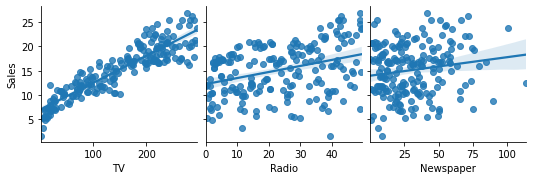

In [ ]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

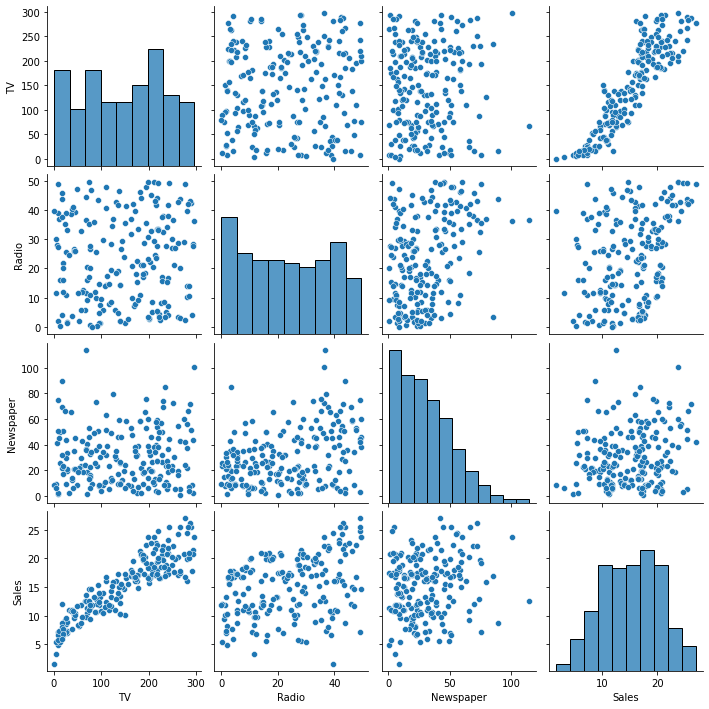

In [ ]:
sns.pairplot(data)

In [ ]:
df = data
df['Average Budget'] = df.drop(['Sales'], axis=1).mean(axis='columns')
df.head()

,TV,Radio,Newspaper,Sales,Average Budget
0,230.1,37.8,69.2,22.1,112.366667
1,44.5,39.3,45.1,10.4,42.966667
2,17.2,45.9,69.3,12.0,44.133333
3,151.5,41.3,58.5,16.5,83.766667
4,180.8,10.8,58.4,17.9,83.333333


In [ ]:
df['Average Budget'].mean()

66.9535

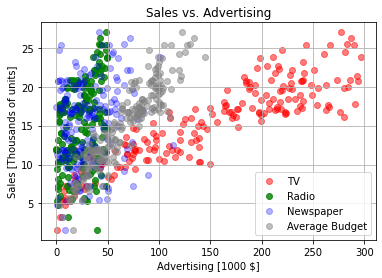

In [ ]:
plt.scatter(data['TV'],data['Sales'],c="red",alpha=0.5, label='TV')
plt.scatter(data['Radio'],data['Sales'],c="green",alpha=0.8, label='Radio')
plt.scatter(data['Newspaper'],data['Sales'],c="blue",alpha=0.3, label= 'Newspaper')
plt.scatter(data['Average Budget'],data['Sales'],c="gray",alpha=0.5, label= 'Average Budget')
plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()

Applying Linear Models on Average Budgeet

In [ ]:
y = df['Sales']
x = df[['Average Budget']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
#Simple Linear Regression
avg_regression = LinearRegression()
avg_regression.fit(x_train,y_train)
y_pred = avg_regression.predict(x_test)
score = avg_regression.score(x_test, y_test)
MSE = np.sqrt(mean_squared_error(y_test,y_pred))
avg_rgs_coef = avg_regression.coef_
avg_rgs_intercept = avg_regression.intercept_
print("Score: ", score)
print("Error: ", MSE)
print("coef: ",avg_rgs_coef)
print("intercept: ",avg_rgs_intercept)

Score:  0.8456556633464667
Error:  2.2697402281440273
coef:  [0.15338209]
intercept:  4.924012999480922


# Optimization Problem 1: Average Budget Model

Linear Regression (Columns): From the above result we can construct the following equation for budget,
b = coef*avg + intercept
b = 0.15338209*avg + 4.9240129994809205

constraints:

avg <= 500

In [ ]:
OpProb_ = LpProblem("AdvsSalesOpt_AVG", LpMaximize)
avg = LpVariable("avg", 0, 500)
OpProb_ += 0.15338209*avg + 4.9240129994809205
status = OpProb_.solve()
LpStatus[status]

'Optimal'

In [ ]:
print(OpProb_)
for v in OpProb_.variables():
    print(v.name, "=", v.varValue)

AdvsSalesOpt_AVG:
MAXIMIZE
0.15338209*avg + 4.9240129994809205
VARIABLES
avg <= 500 Continuous

avg = 500.0


In [ ]:
OptVal_ = 0.15338209*500 + 4.9240129994809205
print("Optimized Budget Sales: ",OptVal)

Optimized Budget Sales:  71.27233720326984


Applying Linear Models for all three budget: TV, Radio and Newspaper

In [ ]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
#Linear Regression Model
regression = LinearRegression()
regression.fit(x_train,y_train)
rgs_y_pred = regression.predict(x_test)
rgs_score = regression.score(x_test, y_test)
rgs_MSE = np.sqrt(mean_squared_error(y_test,rgs_y_pred))
rgs_coef = regression.coef_
rgs_intercept = regression.intercept_
print("Score: ", rgs_score)
print("Error: ", rgs_MSE)
print("coef: ",rgs_coef)
print("intercept: ",rgs_intercept)

Score:  0.8645053923967725
Error:  2.1266293899128947
coef:  [ 0.05368006  0.11152624 -0.00351166]
intercept:  4.773205203269841


In [ ]:
#Lasso Model
lasso = Lasso(alpha= 0.01)
lasso.fit(x_train,y_train)
lss_y_pred = lasso.predict(x_test)
lss_score = lasso.score(x_test, y_test)
lss_MSE = np.sqrt(mean_squared_error(y_test,lss_y_pred))
lss_coef = lasso.coef_
lss_intercept = lasso.intercept_
print("Score: ", lss_score)
print("Error: ", lss_MSE)
print("coef: ",lss_coef)
print("intercept: ",lss_intercept)

Score:  0.8645265455268059
Error:  2.126463381004178
coef:  [ 0.05367812  0.11146301 -0.00347491]
intercept:  4.77386736084013


In [ ]:
#Ridge Model
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
rr_y_pred= rr.predict(x_test)
rr_score = rr.score(x_test, y_test)
rr_MSE = np.sqrt(mean_squared_error(y_test,rr_y_pred))
rr_coef = rr.coef_
rr_intercept = rr.intercept_
print("Score: ", rr_score)
print("Error: ", rr_MSE)
print("coef: ",rr_coef)
print("intercept: ",rr_intercept)

Score:  0.8645054006413064
Error:  2.1266293252126487
coef:  [ 0.05368005  0.1115262  -0.00351165]
intercept:  4.773205854496867


In [ ]:
#ElasticNet
enet = ElasticNet(alpha = 0.01)
enet.fit(x_train, y_train) 
enet_y_pred = enet.predict(x_test)
enet_score = enet.score(x_test, y_test)
enet_MSE = np.sqrt(mean_squared_error(y_test,enet_y_pred))
enet_coef = enet.coef_
enet_intercept = enet.intercept_
print("Score: ", enet_score)
print("Error: ", enet_MSE)
print("coef: ",enet_coef)
print("intercept: ",enet_intercept)

Score:  0.8645166558730818
Error:  2.1265409962196093
coef:  [ 0.05367906  0.11149165 -0.00349257]
intercept:  4.773589229705221


In [ ]:
#Regression with Stochastic Gradient Descent
#SGD is scaling sensative and required scaled data
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
sgd = SGDRegressor(tol=.0001, eta0=.01)
sgd.fit(x_train_s, y_train)
sgd_y_pred = sgd.predict(x_test_s)
sgd_score = sgd.score(x_test_s, y_test)
sgd_MSE = np.sqrt(mean_squared_error(y_test,sgd_y_pred))
sgd_coef = sgd.coef_
sgd_intercept = sgd.intercept_
print("Score: ", sgd_score)
print("Error: ", sgd_MSE)
print("coef: ",sgd_coef)
print("intercept: ",sgd_intercept)

Score:  0.8644857092249013
Error:  2.1267838510107997
coef:  [ 4.54467765  1.63798659 -0.07427019]
intercept:  [15.35654524]


Let take average of all intercept and coef results.

In [ ]:
#I am not counting SGD because coef and intercept is very diff because of scaling issue.
avg_coef = (rgs_coef+lss_coef+rr_coef+enet_coef)/4
avg_intercept = (rgs_intercept+lss_intercept+rr_intercept+enet_intercept)/4
print(avg_coef)
print(avg_intercept)

[ 0.05367932  0.11150177 -0.0034977 ]
4.773466912078015


# Optimization Problem 2: Multi-Variable Budget Model

Linear Regression (Columns): From the above result we can construct the following equation for budget,

B = (0.05367932)T + (0.11150177)R - (0.0034977)N + 4.773466912078015

constraints:

T + R + N <= 1000

In [ ]:
OpProb = LpProblem("AdvsSalesOpt", LpMaximize)
T = LpVariable("TV", 0, 200)
R = LpVariable("Radio", 0, 500)
N = LpVariable("Newspaper", 0, 500)
OpProb +=  0.05367932*T + 0.11150177*R - 0.0034977*N + 4.773466912078015
status = OpProb.solve()
LpStatus[status]

'Optimal'

In [ ]:
print(OpProb)
for v in OpProb.variables():
    print(v.name, "=", v.varValue)

AdvsSalesOpt:
MAXIMIZE
-0.0034977*Newspaper + 0.11150177*Radio + 0.05367932*TV + 4.773466912078015
VARIABLES
Newspaper <= 500 Continuous
Radio <= 500 Continuous
TV <= 200 Continuous

Newspaper = 0.0
Radio = 500.0
TV = 200.0


In [ ]:
OptVal = 0.05368006*200 + 0.11152624*500 - 0.00351166*0 + 4.773205203269837
print("Optimized Budget Sales: ",OptVal)

Optimized Budget Sales:  71.27233720326984
